In [2]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<img src="캡처.jpg">

의사결정나무, 랜덤포레스트 사용 목표 0.7

xtrain 학습
ytrain 검증

# 탐색

In [3]:
xdf = pd.read_csv('X_train.csv',encoding='cp949')
ydf = pd.read_csv('y_train.csv',encoding='cp949')
xtdf = pd.read_csv('X_test.csv',encoding='cp949')
display(xdf.head())
display(ydf.head())
display(xtdf.head())

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8


In [4]:
display(xdf.info())
print()
display(ydf.info())
print()
display(xtdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 273.6+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cust_id  3500 non-null   int64
 1   gender   3500 non-null   int64
dtypes: int64(2)
memory usage: 54.8 KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  2482 non-null   int64  
 1   총구매액     2482 non-null   int64  
 2   최대구매액    2482 non-null   int64  
 3   환불금액     871 non-null    float64
 4   주구매상품    2482 non-null   object 
 5   주구매지점    2482 non-null   object 
 6   내점일수     2482 non-null   int64  
 7   내점당구매건수  2482 non-null   float64
 8   주말방문비율   2482 non-null   float64
 9   구매주기     2482 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 194.0+ KB


None

In [5]:
display(xdf.isnull().sum())
print()
display(ydf.isnull().sum())
print()
display(xtdf.isnull().sum())


cust_id       0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

cust_id    0
gender     0
dtype: int64

cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [6]:
xdf = xdf.merge(ydf, on='cust_id', how='outer')
xdf

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0,1
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,1
3497,3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0,0
3498,3498,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39,0


In [7]:
display(xdf.describe())


,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,gender
count,3500.000000,3.500000e+03,3.500000e+03,1.205000e+03,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,9.191925e+07,1.966424e+07,2.407822e+07,19.253714,2.834963,0.307246,20.958286,0.376000
std,1010.507298,1.635065e+08,3.199235e+07,4.746453e+07,27.174942,1.912368,0.289752,24.748682,0.484449
min,0.000000,-5.242152e+07,-2.992000e+06,5.600000e+03,1.000000,1.000000,0.000000,0.000000,0.000000
25%,874.750000,4.747050e+06,2.875000e+06,2.259000e+06,2.000000,1.666667,0.027291,4.000000,0.000000
50%,1749.500000,2.822270e+07,9.837000e+06,7.392000e+06,8.000000,2.333333,0.256410,13.000000,0.000000
75%,2624.250000,1.065079e+08,2.296250e+07,2.412000e+07,25.000000,3.375000,0.448980,28.000000,1.000000
max,3499.000000,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000,1.000000


In [8]:
xdf.corr()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,gender
cust_id,1.000000,-0.008004,-0.005883,0.070135,-0.025234,-0.004840,0.001900,0.020070,-0.001994
총구매액,-0.008004,1.000000,0.700080,0.419734,0.659084,0.090022,0.014396,-0.212944,-0.150141
최대구매액,-0.005883,0.700080,1.000000,0.410562,0.374147,0.018980,0.022277,-0.115837,-0.114323
환불금액,0.070135,0.419734,0.410562,1.000000,0.270290,-0.063114,-0.062397,-0.211125,-0.078025
내점일수,-0.025234,0.659084,0.374147,0.270290,1.000000,0.225264,-0.010325,-0.293200,-0.155000
내점당구매건수,-0.004840,0.090022,0.018980,-0.063114,0.225264,1.000000,0.007659,-0.091151,-0.043917
주말방문비율,0.001900,0.014396,0.022277,-0.062397,-0.010325,0.007659,1.000000,0.003372,0.073598
구매주기,0.020070,-0.212944,-0.115837,-0.211125,-0.293200,-0.091151,0.003372,1.000000,0.041450
gender,-0.001994,-0.150141,-0.114323,-0.078025,-0.155000,-0.043917,0.073598,0.041450,1.000000


In [9]:
xdf[(xdf['총구매액']<0)]

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
1659,1659,-2992000,-2992000,2992000.0,디자이너,본 점,1,1.000000,0.000000,0,0
3174,3174,-52421520,13616000,97222000.0,기타,본 점,18,4.444444,0.337500,16,0
3488,3488,-18905600,82306000,529602320.0,디자이너,부산본점,31,1.064516,0.242424,11,0


In [10]:
xtdf[(xtdf['총구매액']<0)]

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
579,4079,-150000,-150000,150000.0,구두,분당점,1,1.0,0.0,0
1177,4677,-37440000,-37440000,37440000.0,대형가전,본 점,1,1.0,0.0,0


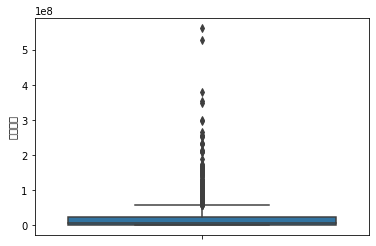

In [11]:
ax = sns.boxplot(y=xdf["환불금액"], data=xdf)

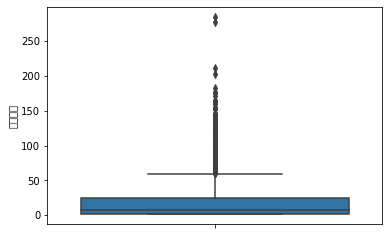

In [12]:
ax = sns.boxplot(y=xdf["내점일수"], data=xdf)

In [13]:
display(xdf.groupby('주구매지점').count().sort_values(by='cust_id',ascending=True))
display(xdf.groupby('주구매상품').count().sort_values(by='cust_id',ascending=True))

,cust_id,총구매액,최대구매액,환불금액,주구매상품,내점일수,내점당구매건수,주말방문비율,구매주기,gender
주구매지점,,,,,,,,,,
상인점,1,1,1,1,1,1,1,1,1,1
창원점,4,4,4,0,4,4,4,4,4,4
전주점,5,5,5,1,5,5,5,5,5,5
센텀시티점,6,6,6,2,6,6,6,6,6,6
울산점,6,6,6,4,6,6,6,6,6,6
대구점,7,7,7,2,7,7,7,7,7,7
포항점,11,11,11,2,11,11,11,11,11,11
안양점,29,29,29,6,29,29,29,29,29,29
인천점,34,34,34,13,34,34,34,34,34,34


,cust_id,총구매액,최대구매액,환불금액,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
주구매상품,,,,,,,,,,
소형가전,2,2,2,0,2,2,2,2,2,2
악기,2,2,2,0,2,2,2,2,2,2
남성 트랜디,2,2,2,1,2,2,2,2,2,2
보석,3,3,3,0,3,3,3,3,3,3
통신/컴퓨터,3,3,3,0,3,3,3,3,3,3
침구/수예,4,4,4,2,4,4,4,4,4,4
액세서리,5,5,5,1,5,5,5,5,5,5
식기,7,7,7,1,7,7,7,7,7,7
란제리/내의,8,8,8,1,8,8,8,8,8,8


In [14]:
xdf.loc[(xdf['주구매상품']=='소형가전')|(xdf['주구매상품']=='대형가전')|(xdf['주구매상품']=='통신/컴퓨터'),'주구매상품'] = '가전'
xdf.loc[(xdf['주구매상품']=='액세서리')|(xdf['주구매상품']=='보석'),'주구매상품'] = '장신구'
xtdf.loc[(xtdf['주구매상품']=='소형가전')|(xtdf['주구매상품']=='대형가전')|(xtdf['주구매상품']=='통신/컴퓨터'),'주구매상품'] = '가전'
xtdf.loc[(xtdf['주구매상품']=='액세서리')|(xtdf['주구매상품']=='보석'),'주구매상품'] = '장신구'


# 전처리

In [15]:
xdf['환불금액'].fillna(0,inplace=True)
xtdf['환불금액'].fillna(0,inplace=True)
xdf.isnull().sum()

cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
gender     0
dtype: int64

In [16]:
xdf=xdf.drop(xdf[(xdf['총구매액']<0)].index)
xtdf=xtdf.drop(xtdf[(xtdf['총구매액']<0)].index)

In [17]:
#주구매상품	주구매지점

xtdf=pd.concat([xtdf, pd.get_dummies(xtdf['주구매상품'])], axis=1)
xdf=pd.concat([xdf, pd.get_dummies(xdf['주구매상품'])], axis=1)

xtdf=pd.concat([xtdf, pd.get_dummies(xtdf['주구매지점'])], axis=1)
xdf=pd.concat([xdf, pd.get_dummies(xdf['주구매지점'])], axis=1)
xtdf

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,...,안양점,영등포점,울산점,인천점,일산점,잠실점,전주점,창원점,청량리점,포항점
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26,...,0,0,0,0,0,0,0,0,0,0
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3,...,0,0,0,0,0,1,0,0,0,0
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3,...,0,0,0,0,0,0,0,0,0,0
3,3503,7594080,5225000,0.0,주방용품,부산본점,5,2.000000,0.000000,47,...,0,0,0,0,0,0,0,0,0,0
4,3504,1795790,1411200,0.0,수산품,청량리점,3,2.666667,0.125000,8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,5977,82581500,23976000,0.0,골프,부산본점,8,1.750000,0.642857,40,...,0,0,0,0,0,0,0,0,0,0
2478,5978,480000,480000,0.0,섬유잡화,광주점,1,1.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
2479,5979,260003790,25750000,0.0,남성 캐주얼,본 점,19,3.736842,0.915493,18,...,0,0,0,0,0,0,0,0,0,0
2480,5980,88991520,18120000,0.0,육류,본 점,5,3.600000,0.444444,60,...,0,0,0,0,0,0,0,0,0,0


In [18]:
xtdf

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,...,안양점,영등포점,울산점,인천점,일산점,잠실점,전주점,창원점,청량리점,포항점
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26,...,0,0,0,0,0,0,0,0,0,0
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3,...,0,0,0,0,0,1,0,0,0,0
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3,...,0,0,0,0,0,0,0,0,0,0
3,3503,7594080,5225000,0.0,주방용품,부산본점,5,2.000000,0.000000,47,...,0,0,0,0,0,0,0,0,0,0
4,3504,1795790,1411200,0.0,수산품,청량리점,3,2.666667,0.125000,8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,5977,82581500,23976000,0.0,골프,부산본점,8,1.750000,0.642857,40,...,0,0,0,0,0,0,0,0,0,0
2478,5978,480000,480000,0.0,섬유잡화,광주점,1,1.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
2479,5979,260003790,25750000,0.0,남성 캐주얼,본 점,19,3.736842,0.915493,18,...,0,0,0,0,0,0,0,0,0,0
2480,5980,88991520,18120000,0.0,육류,본 점,5,3.600000,0.444444,60,...,0,0,0,0,0,0,0,0,0,0


In [19]:
xdf.columns

Index(['cust_id', '총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수',
       '주말방문비율', '구매주기', 'gender', '가공식품', '가구', '가전', '건강식품', '골프', '구두',
       '기타', '남성 캐주얼', '남성 트랜디', '남성정장', '농산물', '디자이너', '란제리/내의', '명품',
       '모피/피혁', '생활잡화', '섬유잡화', '셔츠', '수산품', '스포츠', '시티웨어', '식기', '아동', '악기',
       '육류', '일용잡화', '장신구', '젓갈/반찬', '주류', '주방가전', '주방용품', '차/커피', '축산가공',
       '침구/수예', '캐주얼', '커리어', '트래디셔널', '피혁잡화', '화장품', '강남점', '관악점', '광주점',
       '노원점', '대구점', '대전점', '동래점', '미아점', '본  점', '부산본점', '부평점', '분당점', '상인점',
       '센텀시티점', '안양점', '영등포점', '울산점', '인천점', '일산점', '잠실점', '전주점', '창원점',
       '청량리점', '포항점'],
      dtype='object')

In [20]:
stcol=['총구매액', '최대구매액', '환불금액','내점일수', '내점당구매건수','주말방문비율', '구매주기']

for i in stcol:
    sc = StandardScaler()
    sc.fit(xdf[[i]])
    xdf[i] = sc.transform(xdf[[i]])
    xtdf[i] = sc.transform(xtdf[[i]])

In [21]:
xtdf=xtdf.reset_index(drop=True)

In [22]:
# ydf=xdf['gender']
# xdf.drop(['주구매상품','주구매지점','cust_id','gender'],axis=1,inplace=True)
# # xtdf.drop(['주구매상품','주구매지점','cust_id'],axis=1,inplace=True)
xc=list(xdf.columns)
xc.remove('cust_id')
xc.remove('gender')
xc.remove('주구매상품')
xc.remove('주구매지점')
xc
X=xdf[xc]
y=xdf['gender']
t_X=xtdf[xc]
t_X

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,가공식품,가구,가전,...,안양점,영등포점,울산점,인천점,일산점,잠실점,전주점,창원점,청량리점,포항점
0,-0.129155,0.073338,-0.141447,-0.230165,-0.718528,1.663748,0.203271,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.336341,0.591075,1.388386,2.602777,-0.210330,0.215742,-0.725928,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.304118,-0.151010,0.779241,3.007483,6.164633,-0.773218,-0.725928,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.516311,-0.451184,-0.282311,-0.524497,-0.436941,-1.060592,1.051670,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.551771,-0.570434,-0.282311,-0.598079,-0.088309,-0.629239,-0.523929,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,-0.057718,0.135124,-0.282311,-0.414122,-0.567678,1.157799,0.768870,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2476,-0.559818,-0.599551,-0.282311,-0.671662,-0.959889,-1.060592,-0.847128,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2477,1.027325,0.190593,-0.282311,-0.009416,0.471338,2.098619,-0.119929,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2478,-0.018517,-0.047982,-0.282311,-0.524497,0.399776,0.473110,1.576869,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 학습 및 평가

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=3)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))



DecisionTreeClassifier 정확도: 0.5829
RandomForestClassifier 정확도: 0.6343


In [24]:
params = { 'n_estimators' : [10,50,100],
           'max_depth' : [4,6, 8, 10],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
rf_clf = RandomForestClassifier(random_state=3, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params,cv=2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 50}
최고 예측 정확도: 0.6550


In [25]:

rf_clf = RandomForestClassifier(max_depth= 6, min_samples_leaf= 12, min_samples_split= 8, n_estimators= 50)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))



RandomForestClassifier 정확도: 0.6529


In [26]:
# ROC_AUC score가 높은 랜덤폴스트로 테스트 데이터로 결과 예측값 정리
pred_res = pd.DataFrame(rf_clf.predict_proba(t_X))
pred_res
result = pd.concat([xtdf['cust_id'], pred_res[[1]]], axis=1)
result.columns = [['cust_id', '남']]
result

,cust_id,남
0,3500,0.317299
1,3501,0.224537
2,3502,0.230662
3,3503,0.422836
4,3504,0.479233
...,...,...
2475,5977,0.415894
2476,5978,0.530653
2477,5979,0.410265
2478,5980,0.392937


In [27]:
result.to_csv('백화점성별예측.csv', header=False, index=False)